In [63]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn import mixture
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, fowlkes_mallows_score, completeness_score
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


from scipy import linalg
import missingno
import sklearn
from xgboost import XGBClassifier
from xgboost import plot_tree

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1pYKNCwkfdr42SFO0TQjpbbF2luFAHZLW"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.3, random_state = 117, axis = 0)

In [2]:
df.head()

,New_ID,job,education,contact,poutcome,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
21523,21523,5,2,1,1,60,1,0,374,0,0,19,aug,276,2,-1,0,0
18080,18080,7,2,2,1,32,1,0,-31,0,1,30,jul,96,6,-1,0,0
28962,28962,4,2,1,2,48,2,0,-269,0,0,2,feb,167,1,263,3,0
22422,22422,2,2,1,1,49,1,0,1982,1,1,22,aug,73,15,-1,0,0
11522,11522,7,3,1,1,40,1,0,2469,0,1,19,jun,202,2,-1,0,0


In [3]:
X = df.drop(['New_ID','month','day', 'y'], axis = 1)
Y = df['y']

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


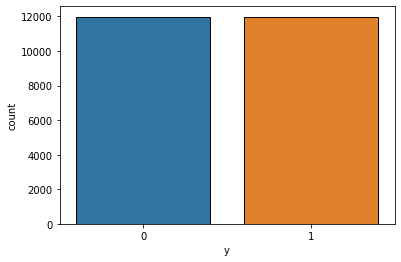

In [4]:
smote = SMOTE(random_state = 402)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [5]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
7752,4,2,1,1,53,1,0,175,1,0,49,4,-1,0
4328,6,2,1,1,50,1,0,-221,0,1,90,1,-1,0
1470,5,2,1,1,60,1,0,-1110,1,0,143,2,-1,0
1749,9,2,1,1,28,1,0,-353,0,1,299,1,-1,0
22922,6,2,1,2,49,1,0,3609,0,0,231,1,0,0


In [6]:
columns = X.columns
X_train = preprocessing.normalize(X_train)
X_train = pd.DataFrame(X_train, columns = columns)
X_train.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
0,0.021118,0.010559,0.005280,0.005280,0.279817,0.005280,0.0,0.923924,0.005280,0.000000,0.258699,0.021118,-0.005280,0.0
1,0.024600,0.008200,0.004100,0.004100,0.205002,0.004100,0.0,-0.906111,0.000000,0.004100,0.369004,0.004100,-0.004100,0.0
2,0.004461,0.001784,0.000892,0.000892,0.053533,0.000892,0.0,-0.990366,0.000892,0.000000,0.127588,0.001784,-0.000892,0.0
3,0.019415,0.004314,0.002157,0.002157,0.060403,0.002157,0.0,-0.761503,0.000000,0.002157,0.645013,0.002157,-0.002157,0.0
4,0.001659,0.000553,0.000276,0.000553,0.013548,0.000276,0.0,0.997864,0.000000,0.000000,0.063870,0.000276,0.000000,0.0


columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

In [7]:
columns = X.columns
X = preprocessing.normalize(X)
X = pd.DataFrame(X, columns = columns)
X.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
0,0.010668,0.004267,0.002134,0.002134,0.128011,0.002134,0.0,0.797935,0.000000,0.000000,0.588850,0.004267,-0.002134,0.000000
1,0.065856,0.018816,0.018816,0.009408,0.301057,0.009408,0.0,-0.291649,0.000000,0.009408,0.903172,0.056448,-0.009408,0.000000
2,0.009652,0.004826,0.002413,0.004826,0.115818,0.004826,0.0,-0.649066,0.000000,0.000000,0.402952,0.002413,0.634589,0.007239
3,0.001008,0.001008,0.000504,0.000504,0.024697,0.000504,0.0,0.998987,0.000504,0.000504,0.036794,0.007560,-0.000504,0.000000
4,0.002825,0.001211,0.000404,0.000404,0.016145,0.000404,0.0,0.996535,0.000000,0.000404,0.081531,0.000807,-0.000404,0.000000


columns = X.columns
X_train = preprocessing.normalize(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = preprocessing.normalize(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

In [8]:
Y_train.value_counts(normalize=True)

1    0.500156
0    0.499844
Name: y, dtype: float64

In [9]:
Y_test.value_counts(normalize=True)

0    0.500626
1    0.499374
Name: y, dtype: float64

## Functions

In [10]:
def kmeans_run(X,Y):
    
    inertias = []
    silhouette = []
    homogeneity = []
    for i in range(2, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            ##tol=1e-04, 
            random_state=50
        ).fit(X)
        inertias.append(km.inertia_)
        silhouette.append(silhouette_score(X, km.labels_))
        homogeneity.append(homogeneity_score(Y,km.labels_))
        
    # plot
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1,3,1)
    plt.plot(inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertias')
    
    bx = fig.add_subplot(1,3,2)
    plt.plot(silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette')
    
    cx = fig.add_subplot(1,3,3)
    plt.plot(homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('homogeneity')
    plt.show()
    

def em_run(X,Y):
    silhouette = []
    aic = []
    bic = []
    homogeneity = []
    lowest_bic = np.infty
    lowest_aic = np.infty

    n_components_range = np.arange(2,16,3)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for i in n_components_range:
            em = GaussianMixture(
                n_components=i,
                covariance_type=cv_type,
                n_init=10,
                max_iter=1000,
                random_state=50
            ).fit(X)
            prediction = em.predict(X)
            aic.append(em.aic(X))
            bic.append(em.bic(X))
            silhouette.append(silhouette_score(X, prediction))
            homogeneity.append(homogeneity_score(Y,prediction))            
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gem = em # Plot the BIC scores
        
    # Plot the BIC scores
    clf = best_gem
    bars = []
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
    plt.figure(figsize=(20, 10))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
    plt.title('BIC score per model')
    xpos = np.mod(np.argmin(bic), len(n_components_range)) + .65 +\
        .2 * np.floor(np.argmin(bic) / len(n_components_range))
    plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

In [11]:
#Model Evaluation
def kmeans_eval(X,Y,n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)
    prediction = kmeans.fit_predict(X)
    adj_rand = adjusted_rand_score(Y,kmeans.labels_)
    norm = normalized_mutual_info_score(Y,kmeans.labels_)
    adj_mutual = adjusted_mutual_info_score(Y,kmeans.labels_)
    fowlkes = fowlkes_mallows_score(Y,kmeans.labels_)
    sil = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    homog = homogeneity_score(Y, kmeans.labels_)
    complete = completeness_score(Y, kmeans.labels_)
    
    print("Model Evaluation: K-Means")
    print("| Clusters = ", n_clusters)
    print("| Iterations to converge = ", kmeans.n_iter_)
    print("| Adjusted rand score = {:.2f}".format(adj_rand), " | A perfect labeling would be scored 1" )
    print("| Normalized Mutual Information Score = {:.2f}".format(norm))
    print("| Adjusted Mutual Information Score = {:.2f}".format(adj_mutual))
    print("| Fowlkes Mallows Score = {:.2f}".format(fowlkes))
    print("| Silhouette Coefficient = {:.2f}".format(sil))
    print('| Inertia = ' , kmeans.inertia_)
    print("| Homogeneity Score = {:.2f}".format(homog))
    print('| completeness score = {:.2f}'.format(complete))
    print(" --- ")
    
    
    plt.scatter(X.iloc[prediction==0, 0], X.iloc[prediction==0, 1], s=100, c='red', label ='Cluster 1')
    plt.scatter(X.iloc[prediction==1, 0], X.iloc[prediction==1, 1], s=100, c='blue', label ='Cluster 2')
    plt.scatter(X.iloc[prediction==2, 0], X.iloc[prediction==2, 1], s=100, c='black', label ='Cluster 3')
    plt.scatter(X.iloc[prediction==3, 0], X.iloc[prediction==3, 1], s=100, c='purple', label ='Cluster 4')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
    plt.title('Kmeans')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.show()
    
    
    
def em_eval(X,Y,n_components, covariance_type):
    gmm = GaussianMixture(n_components = n_components, 
                      covariance_type = covariance_type,
                      random_state=50).fit(X)
    labels = gmm.predict(X)
    adj_rand = adjusted_rand_score(Y,labels)
    norm = normalized_mutual_info_score(Y,labels)
    adj_mutual = adjusted_mutual_info_score(Y,labels)
    fowlkes = fowlkes_mallows_score(Y,labels)
    sil = silhouette_score(X, labels, metric = 'euclidean')
    homog = homogeneity_score(Y, labels)
    complete = completeness_score(Y, labels)
    
    print("Model Evaluation: EM")
    print("| Components = ", n_components)
    print("| Covariance = ", covariance_type)
    print("| Adjusted rand score = {:.2f}".format(adj_rand), " | A perfect labeling would be scored 1" )
    print("| Normalized Mutual Information Score = {:.2f}".format(norm))
    print("| Adjusted Mutual Information Score = {:.2f}".format(adj_mutual))
    print("| Fowlkes Mallows Score = {:.2f}".format(fowlkes))
    print("| Silhouette Coefficient = {:.2f}".format(sil))    
    print('| Log-likelihood value = {:.2f}'.format(gmm.lower_bound_))
    print("| Homogeneity Score = {:.2f}".format(homog))
    print('| completeness score = {:.2f}'.format(complete))
    print(" --- ")
    
    #https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    ax=None
    ax = ax or plt.gca()
    label = True
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    plt.title('EM')
    plt.xlabel('component1')
    plt.ylabel('component2')
    plt.show()
    
   

In [12]:
def PCA_run(X,Y): 
    #https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
    pca = PCA().fit(X)
    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    xi = np.arange(1, 15, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    print("Variance explained by the First principal component = ", np.cumsum(pca.explained_variance_ratio_ * 100)[0])
    print("Variance explained by the First 2 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[1])
    print("Variance explained by the First 3 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[2])
    print("Variance explained by the First 4 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[3])
    print("Variance explained by the First 5 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[4])
    
    pca_95 = PCA(n_components=0.95, random_state =50)
    pca_95.fit(X)
    X_pca_95 = pca_95.transform(X)
    
    print("PCA 95% shape", X_pca_95.shape)
    
    
def ICA_run(X,Y):
    kurtosis = []
    for i in range(1, 13):
        ica = FastICA(
            n_components=i,
            max_iter=10000,
            random_state=50
        ).fit_transform(X)
        ica = pd.DataFrame(ica)
        kurtosis.append(ica.kurt(axis=0).abs().mean())
    plt.plot(range(1,13), kurtosis, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Kurtosis')
    plt.plot()
    
    


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Clustering 1 - K-Means

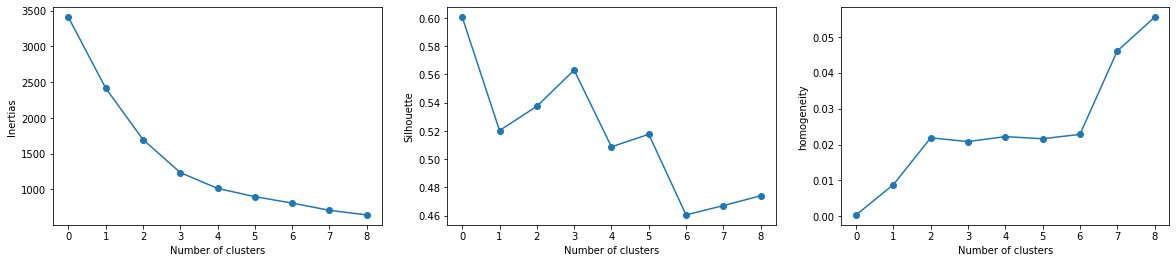

In [14]:
kmeans_run(X,Y)

Model Evaluation: K-Means
| Clusters =  3
| Iterations to converge =  15
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.44
| Silhouette Coefficient = 0.52
| Inertia =  2416.3095689774614
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


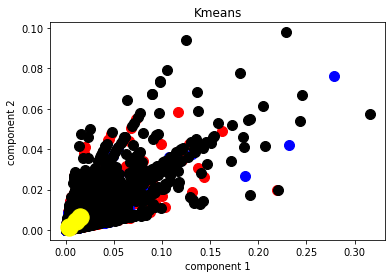

In [15]:
kmeans_eval(X,Y,n_clusters = 3)

In [16]:
kmeans = KMeans(n_clusters=3, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)

y_kmeans = kmeans.fit_predict(X)

## Clustering 1 - EM (Expectation Maximization)

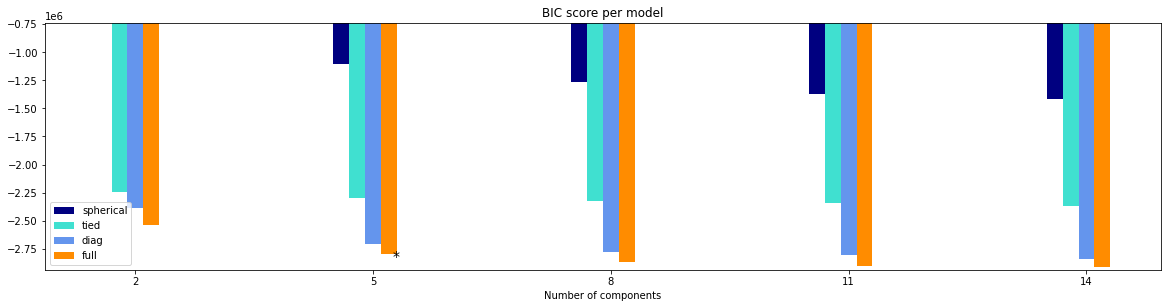

In [17]:
em_run(X,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.02  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.05
| Adjusted Mutual Information Score = 0.05
| Fowlkes Mallows Score = 0.40
| Silhouette Coefficient = 0.24
| Log-likelihood value = 58.25
| Homogeneity Score = 0.07
| completeness score = 0.04
 --- 


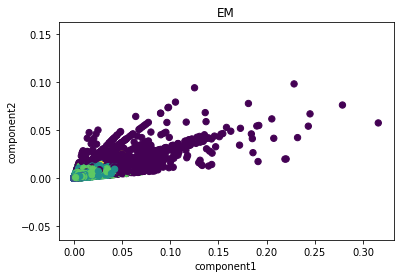

Model Evaluation: EM
| Components =  5
| Covariance =  diag
| Adjusted rand score = 0.03  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.07
| Adjusted Mutual Information Score = 0.07
| Fowlkes Mallows Score = 0.39
| Silhouette Coefficient = 0.14
| Log-likelihood value = 56.44
| Homogeneity Score = 0.10
| completeness score = 0.05
 --- 


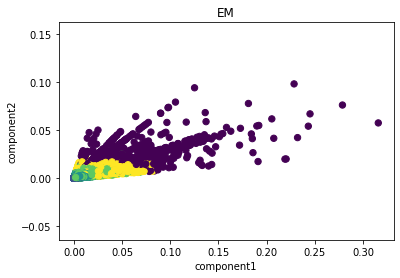

In [18]:
em_eval(X,Y,n_components=5,covariance_type='full')
em_eval(X,Y,n_components=5,covariance_type='diag')

## PCA

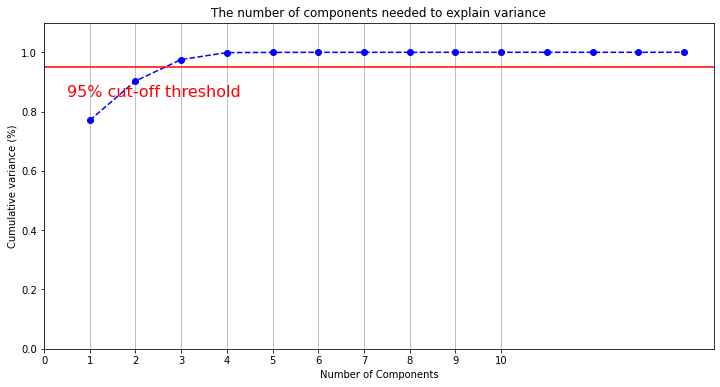

Variance explained by the First principal component =  77.07538022373285
Variance explained by the First 2 principal components =  90.31524698254782
Variance explained by the First 3 principal components =  97.56604128922176
Variance explained by the First 4 principal components =  99.88887986240711
Variance explained by the First 5 principal components =  99.96585753973935
PCA 95% shape (23970, 3)


In [19]:
PCA_run(X,Y)

Text(0.5, 1.0, '')

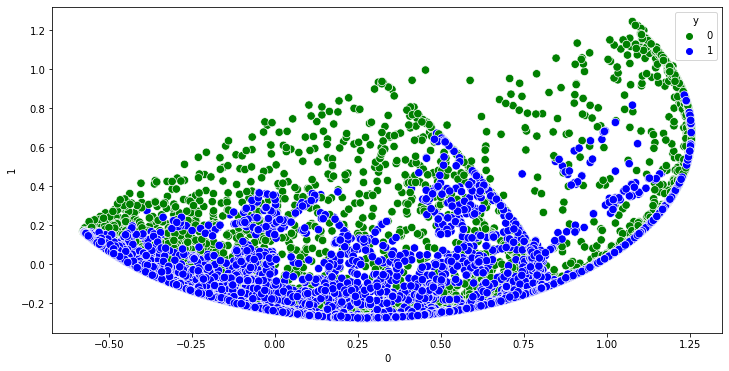

In [20]:
X_PCA = PCA(n_components = 3, random_state = 50).fit_transform(X)
X_PCA = pd.DataFrame(X_PCA)

plt.figure()
sns.scatterplot(x=X_PCA.iloc[:,0], y=X_PCA.iloc[:,1], s = 70,
              hue = Y, palette = ['green','blue'])
plt.title("")

Text(0.5, 0, 'Third principal component')

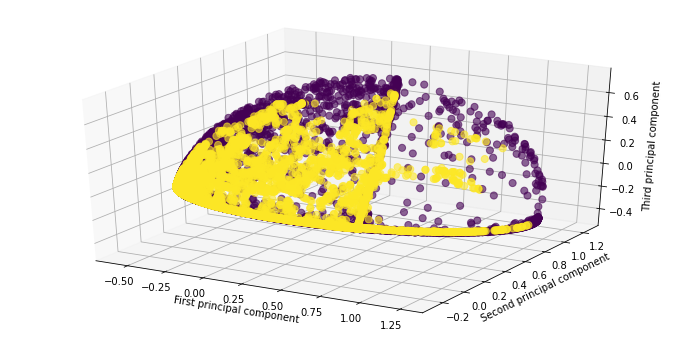

In [21]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_PCA.iloc[:,0], 
                    X_PCA.iloc[:,1],
                    X_PCA.iloc[:,2],
                   c = Y, s=50, alpha = 0.6)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')


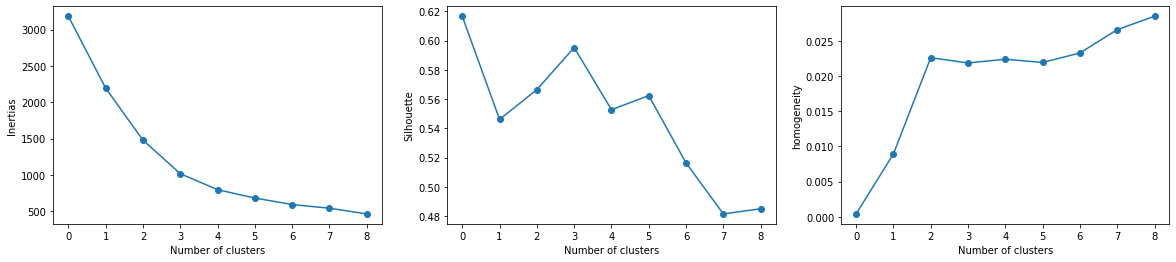

In [22]:
kmeans_run(X_PCA,Y)

Model Evaluation: K-Means
| Clusters =  3
| Iterations to converge =  14
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.44
| Silhouette Coefficient = 0.55
| Inertia =  2194.1092564184987
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


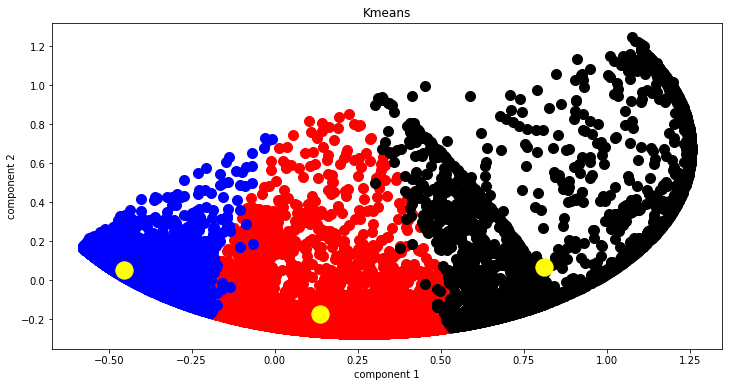

In [23]:
kmeans_eval(X_PCA,Y,n_clusters = 3)

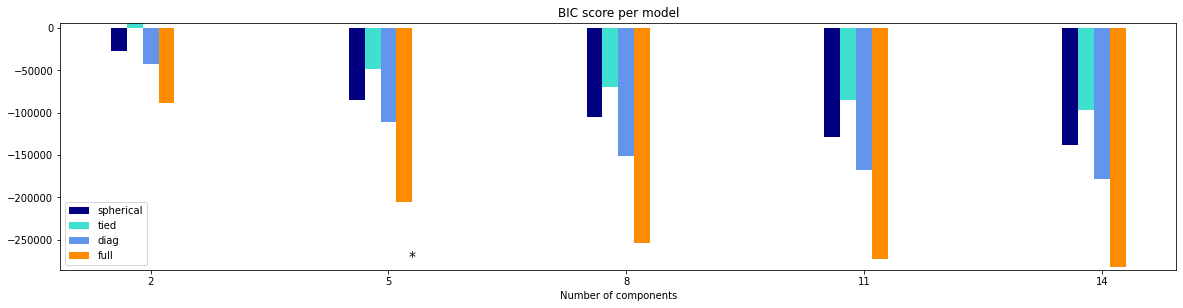

In [24]:
em_run(X_PCA,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.00  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.35
| Silhouette Coefficient = 0.39
| Log-likelihood value = 4.22
| Homogeneity Score = 0.02
| completeness score = 0.01
 --- 


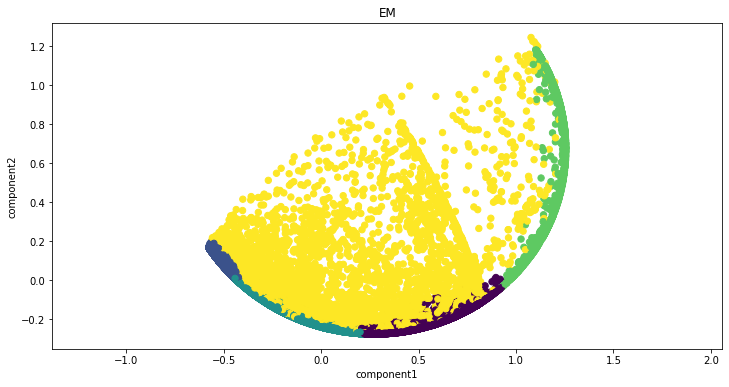

In [25]:
em_eval(X_PCA,Y,n_components = 5, covariance_type = 'full')


## ICA

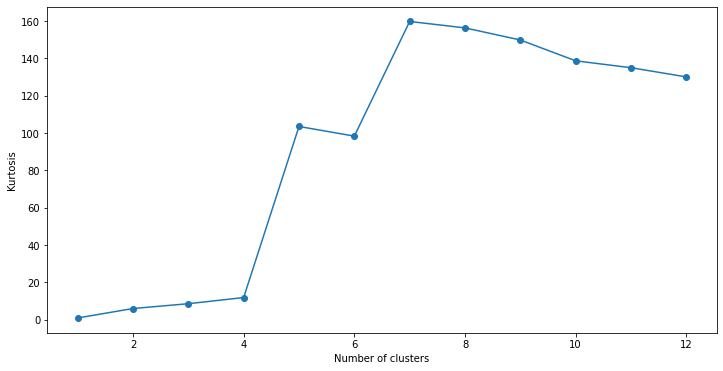

In [26]:
ICA_run(X,Y)

In [27]:
X_ICA = FastICA(n_components = 3, random_state =50).fit_transform(X)
X_ICA = pd.DataFrame(X_ICA)

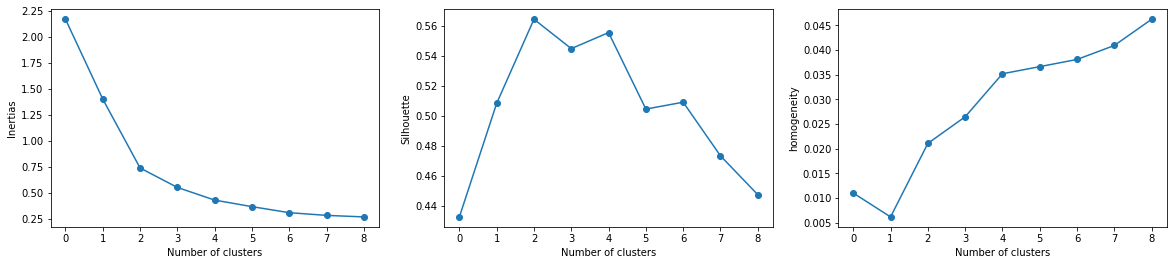

In [28]:
kmeans_run(X_ICA,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  8
| Adjusted rand score = 0.02  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.51
| Silhouette Coefficient = 0.43
| Inertia =  2.1696154177722087
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


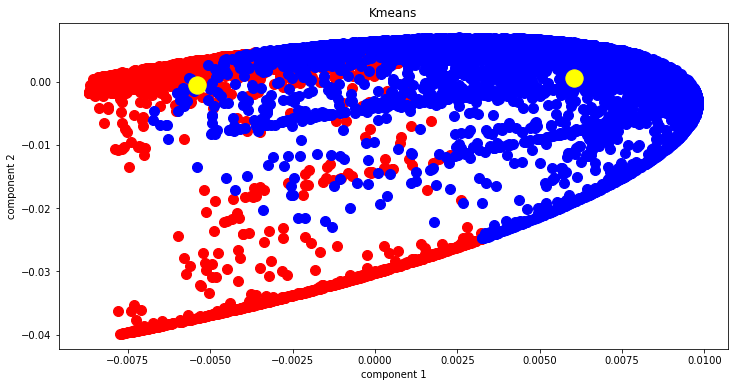

In [29]:
kmeans_eval(X_ICA,Y,2)

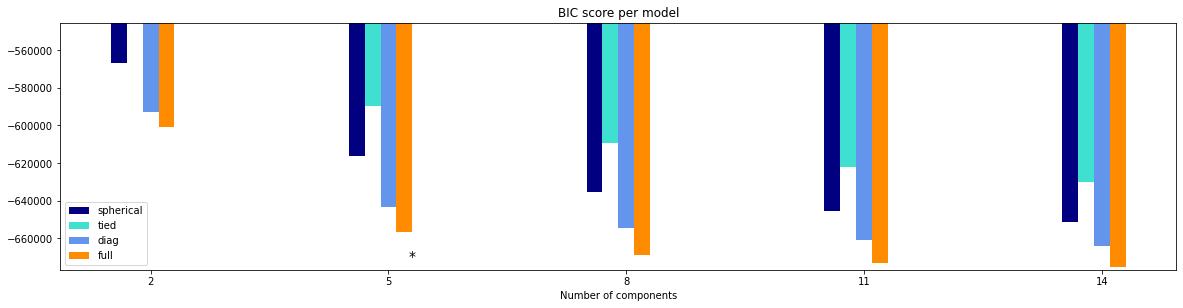

In [30]:
em_run(X_ICA,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.02
| Adjusted Mutual Information Score = 0.02
| Fowlkes Mallows Score = 0.38
| Silhouette Coefficient = 0.52
| Log-likelihood value = 13.71
| Homogeneity Score = 0.03
| completeness score = 0.01
 --- 


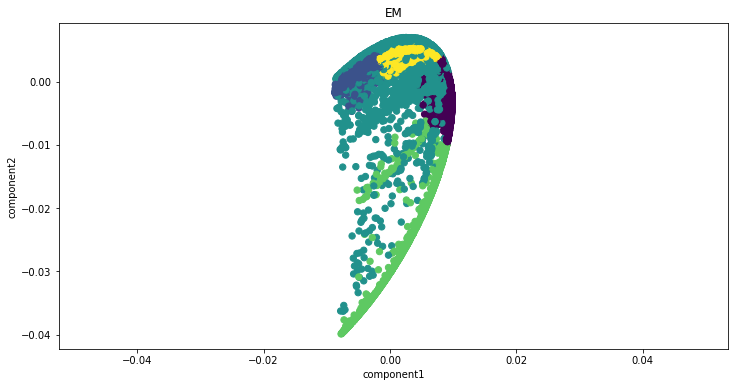

In [31]:
em_eval(X_ICA,Y,n_components = 5, covariance_type = 'full')

## RandomProjection

In [32]:
X_grp = GaussianRandomProjection(n_components = 3, eps = 0.5, random_state = 50).fit_transform(X)
X_grp_df = pd.DataFrame(X_grp)
X_grp_df.head()

,0,1,2
0,0.628787,0.129886,-0.140471
1,0.071230,0.104150,-0.580344
2,-0.037247,-0.101927,-0.435113
3,0.641240,0.093138,0.180020
4,0.631652,0.093768,0.168427


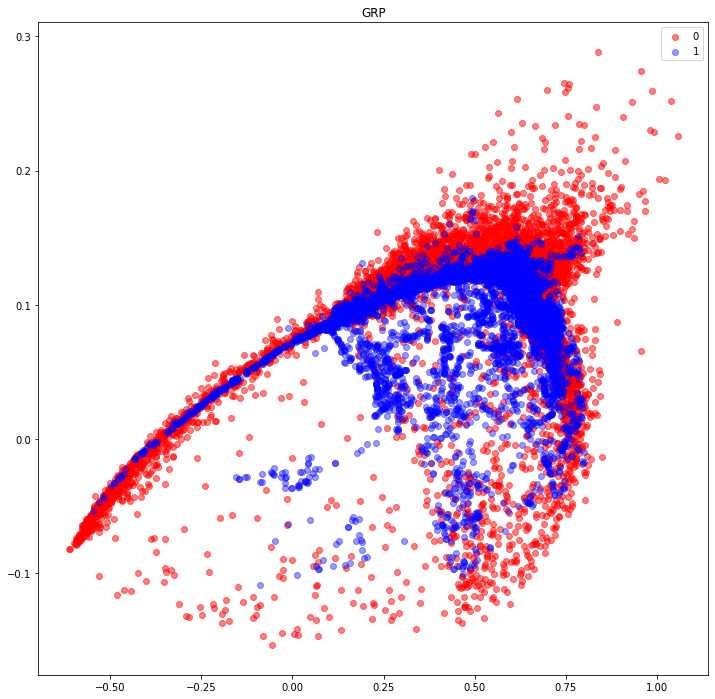

In [33]:
y = Y
plt.figure(figsize=(12,12))

plt.scatter(X_grp[Y==0, 0], X_grp[Y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_grp[Y==1, 0], X_grp[Y==1, 1], color='blue', alpha=0.4,label='1')
plt.title("GRP")
plt.legend()
plt.show()

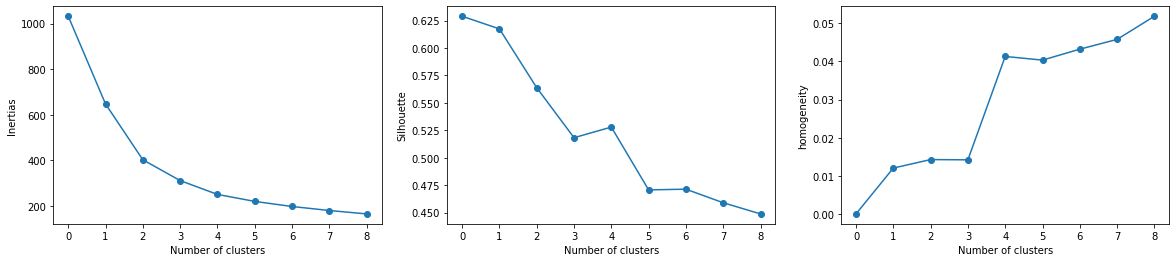

In [34]:
kmeans_run(X_grp,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  7
| Adjusted rand score = -0.00  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = -0.00
| Fowlkes Mallows Score = 0.53
| Silhouette Coefficient = 0.63
| Inertia =  1032.088639216062
| Homogeneity Score = 0.00
| completeness score = 0.00
 --- 


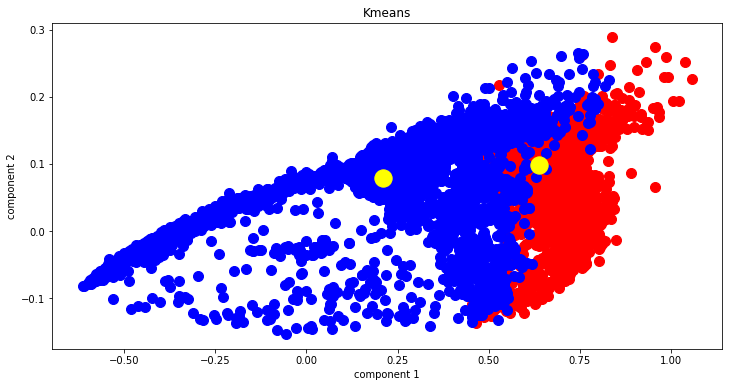

In [35]:
kmeans_eval(X_grp_df,Y,2)

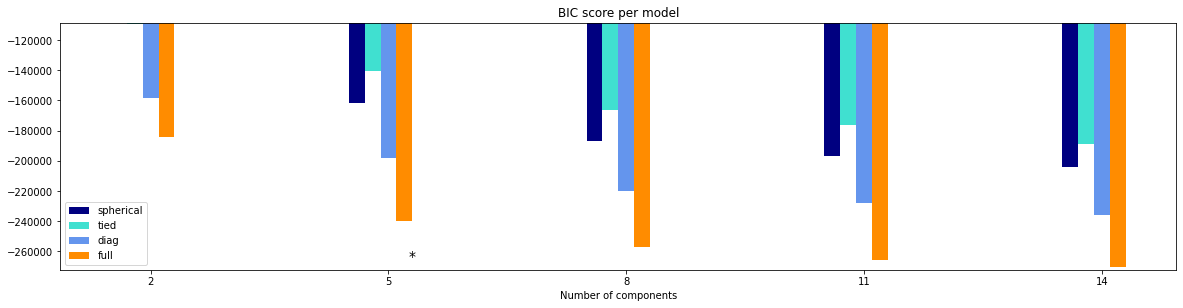

In [36]:
em_run(X_grp_df,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.02
| Adjusted Mutual Information Score = 0.02
| Fowlkes Mallows Score = 0.35
| Silhouette Coefficient = 0.21
| Log-likelihood value = 5.01
| Homogeneity Score = 0.02
| completeness score = 0.01
 --- 


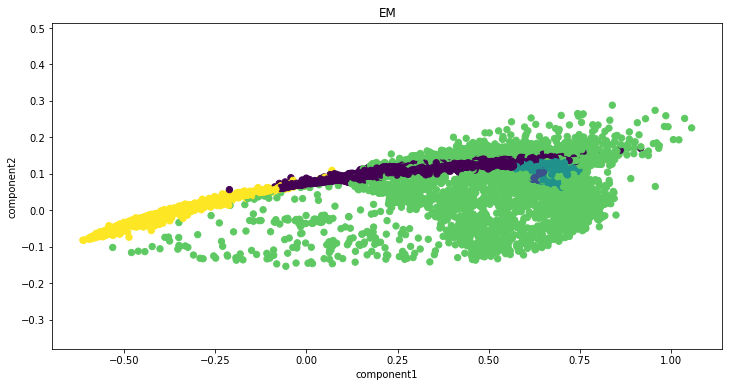

In [37]:
em_eval(X_grp_df,Y,5,'full')

## Random Forest Classifier

In [64]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500, random_state = 50, n_jobs = -1))
sel.fit(X,Y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                                 random_state=50))

In [65]:
sel.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False])

In [68]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['education', 'balance', 'housing', 'duration', 'campaign', 'pdays'], dtype='object')


In [69]:
X_RandForest = X[selected_feat]

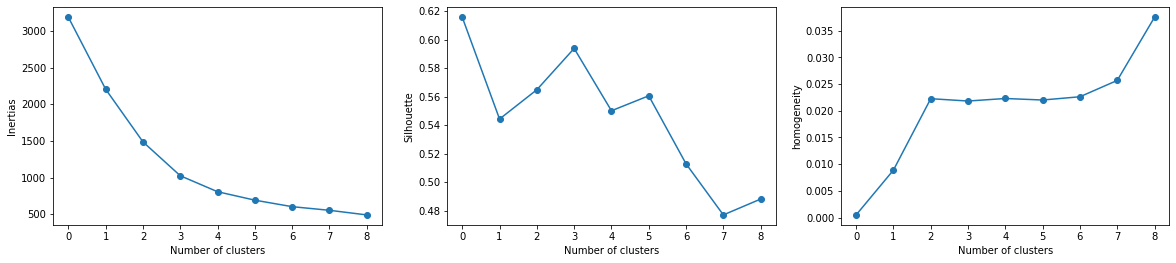

In [70]:
kmeans_run(X_RandForest,Y)

Model Evaluation: K-Means
| Clusters =  3
| Iterations to converge =  11
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.44
| Silhouette Coefficient = 0.54
| Inertia =  2205.6116519966313
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


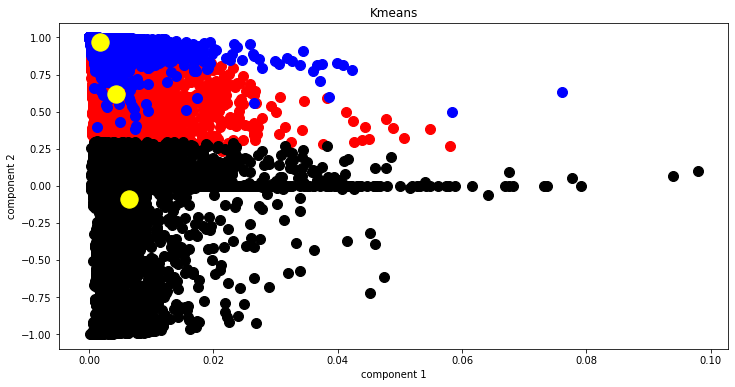

In [71]:
kmeans_eval(X_RandForest,Y,3)

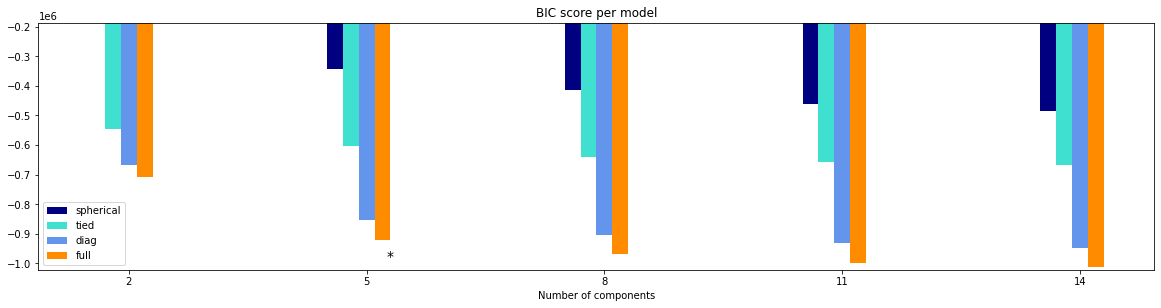

In [72]:
em_run(X_RandForest,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.02  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.04
| Adjusted Mutual Information Score = 0.04
| Fowlkes Mallows Score = 0.35
| Silhouette Coefficient = 0.30
| Log-likelihood value = 19.13
| Homogeneity Score = 0.06
| completeness score = 0.03
 --- 


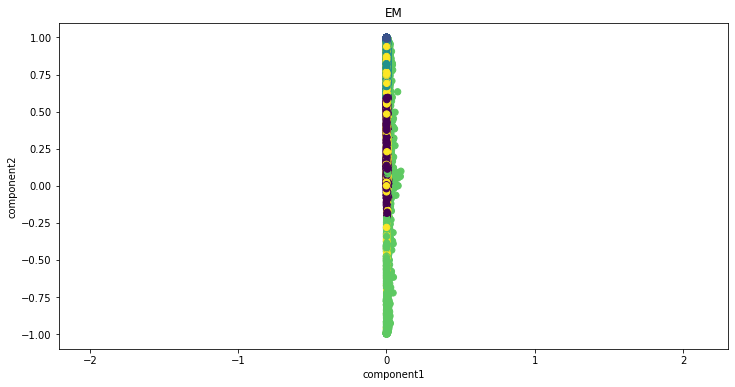

In [73]:
em_eval(X_RandForest,Y,5,'full')

## NN-4

In [74]:
X_ICA_train, X_ICA_test, Y_ICA_train, Y_ICA_test = train_test_split(X_ICA,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_ICA_train.head()

X_PCA_train, X_PCA_test, Y_PCA_train, Y_PCA_test = train_test_split(X_PCA,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_PCA_train.head()

X_grp_train, X_grp_test, Y_grp_train, Y_grp_test = train_test_split(X_grp_df,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_grp_train.head()

X_randforest_train, X_randforest_test, Y_randforest_train, Y_randforest_test = train_test_split(X_RandForest,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_randforest_train.head()

,education,balance,housing,duration,campaign,pdays
7752,0.010559,0.923924,0.005280,0.258699,0.021118,-0.005280
4328,0.008200,-0.906111,0.000000,0.369004,0.004100,-0.004100
1470,0.001784,-0.990366,0.000892,0.127588,0.001784,-0.000892
1749,0.004314,-0.761503,0.000000,0.645013,0.002157,-0.002157
22922,0.000553,0.997864,0.000000,0.063870,0.000276,0.000000


In [75]:
%%time
clf_ica = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_ICA_train, Y_ICA_train)

CPU times: user 7.28 s, sys: 0 ns, total: 7.28 s
Wall time: 7.27 s


In [87]:
%%time
clf_pca = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                        max_iter = 1000,
                    random_state = 42
                    ).fit(X_PCA_train, Y_PCA_train)

CPU times: user 20 s, sys: 0 ns, total: 20 s
Wall time: 19.9 s


In [77]:
%%time
clf_grp = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_grp_train, Y_grp_train)

CPU times: user 1.23 s, sys: 0 ns, total: 1.23 s
Wall time: 1.23 s


In [78]:
%%time
clf_randforest = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    max_iter = 1000,
                    random_state = 42
                    ).fit(X_randforest_train, Y_randforest_train)

CPU times: user 11.8 s, sys: 509 µs, total: 11.8 s
Wall time: 11.8 s


In [79]:
%%time
ClassPrediction_ica = clf_ica.predict(X_ICA_test)
Probability_ica = clf_ica.predict_proba(X_ICA_test)[:,1]

CPU times: user 15.1 ms, sys: 20.4 ms, total: 35.5 ms
Wall time: 12.5 ms


In [80]:
%%time
ClassPrediction_pca = clf_pca.predict(X_PCA_test)
Probability_pca = clf_pca.predict_proba(X_PCA_test)[:,1]

CPU times: user 24.2 ms, sys: 14.6 ms, total: 38.8 ms
Wall time: 10.5 ms


In [81]:
%%time
ClassPrediction_grp = clf_grp.predict(X_grp_test)
Probability_grp = clf_grp.predict_proba(X_grp_test)[:,1]

CPU times: user 19.1 ms, sys: 13 ms, total: 32.1 ms
Wall time: 8.8 ms


In [82]:
%%time
ClassPrediction_randforest = clf_randforest.predict(X_randforest_test)
Probability_randforest = clf_randforest.predict_proba(X_randforest_test)[:,1]

CPU times: user 24.8 ms, sys: 14.8 ms, total: 39.6 ms
Wall time: 10.8 ms


In [83]:
y_train_pred = clf_ica.predict_proba(X_ICA_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_ica.predict_proba(X_ICA_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_ICA_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_ICA_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_ICA_test, y_val_pred_pos)

ClassPrediction_ica = clf_ica.predict(X_ICA_test)
Probability_ica = clf_ica.predict_proba(X_ICA_test)[:,1]

print('Acuracy ', accuracy_score(Y_ICA_test,ClassPrediction_ica))
print('ROC_AUC ', roc_auc_score(Y_ICA_test,Probability_ica))
print('PR ', average_precision_score(Y_ICA_test, Probability_ica))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_ICA_test, ClassPrediction_ica))
print(classification_report(Y_ICA_test, ClassPrediction_ica))

Train AUC Score 0.6484799287194725
Test AUC Score 0.6486058897243108
 
Acuracy  0.5926157697121401
ROC_AUC  0.6486058897243108
PR  0.6342667924241483
 
[[1207 1193]
 [ 760 1634]]
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      2400
           1       0.58      0.68      0.63      2394

    accuracy                           0.59      4794
   macro avg       0.60      0.59      0.59      4794
weighted avg       0.60      0.59      0.59      4794



In [84]:
y_train_pred = clf_pca.predict_proba(X_PCA_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_pca.predict_proba(X_PCA_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_PCA_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_PCA_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_PCA_test, y_val_pred_pos)

ClassPrediction_pca = clf_pca.predict(X_PCA_test)
Probability_pca = clf_pca.predict_proba(X_PCA_test)[:,1]

print('Acuracy ', accuracy_score(Y_PCA_test,ClassPrediction_pca))
print('ROC_AUC ', roc_auc_score(Y_PCA_test,Probability_pca))
print('PR ', average_precision_score(Y_PCA_test, Probability_pca))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_PCA_test, ClassPrediction_pca))
print(classification_report(Y_PCA_test, ClassPrediction_pca))

Train AUC Score 0.8493221643682536
Test AUC Score 0.8387366854636591
 
Acuracy  0.7551105548602419
ROC_AUC  0.8387366854636591
PR  0.820135797587916
 
[[1654  746]
 [ 428 1966]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2400
           1       0.72      0.82      0.77      2394

    accuracy                           0.76      4794
   macro avg       0.76      0.76      0.75      4794
weighted avg       0.76      0.76      0.75      4794



In [85]:
y_train_pred = clf_grp.predict_proba(X_grp_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_grp.predict_proba(X_grp_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_grp_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_grp_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_grp_test, y_val_pred_pos)

ClassPrediction_grp = clf_grp.predict(X_grp_test)
Probability_grp = clf_grp.predict_proba(X_grp_test)[:,1]

print('Acuracy ', accuracy_score(Y_grp_test,ClassPrediction_grp))
print('ROC_AUC ', roc_auc_score(Y_grp_test,Probability_grp))
print('PR ', average_precision_score(Y_grp_test, Probability_grp))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_grp_test, ClassPrediction_grp))
print(classification_report(Y_grp_test, ClassPrediction_grp))

Train AUC Score 0.5
Test AUC Score 0.5
 
Acuracy  0.49937421777221525
ROC_AUC  0.5
PR  0.49937421777221525
 
[[   0 2400]
 [   0 2394]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2400
           1       0.50      1.00      0.67      2394

    accuracy                           0.50      4794
   macro avg       0.25      0.50      0.33      4794
weighted avg       0.25      0.50      0.33      4794



/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_train_pred = clf_randforest.predict_proba(X_randforest_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_randforest.predict_proba(X_randforest_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_randforest_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_randforest_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_randforest_test, y_val_pred_pos)

ClassPrediction_randforest = clf_randforest.predict(X_randforest_test)
Probability_randforest = clf_randforest.predict_proba(X_randforest_test)[:,1]

print('Acuracy ', accuracy_score(Y_randforest_test,ClassPrediction_randforest))
print('ROC_AUC ', roc_auc_score(Y_randforest_test,Probability_randforest))
print('PR ', average_precision_score(Y_randforest_test, Probability_randforest))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_randforest_test, ClassPrediction_randforest))
print(classification_report(Y_randforest_test, ClassPrediction_randforest))

Train AUC Score 0.9116600956154177
Test AUC Score 0.9065551030353661
 
Acuracy  0.8314559866499791
ROC_AUC  0.9065551030353661
PR  0.8911175457713081
 
[[1894  506]
 [ 302 2092]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2400
           1       0.81      0.87      0.84      2394

    accuracy                           0.83      4794
   macro avg       0.83      0.83      0.83      4794
weighted avg       0.83      0.83      0.83      4794



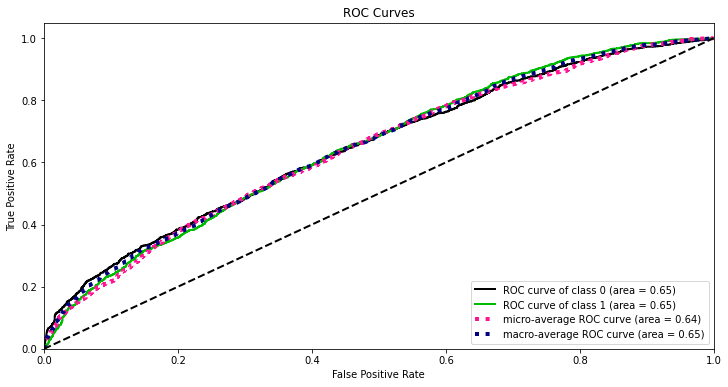

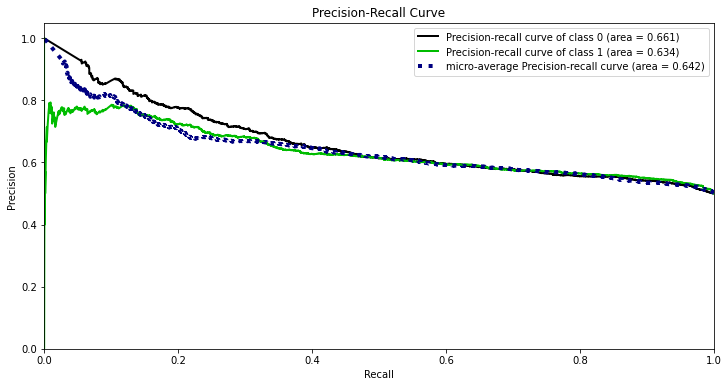

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

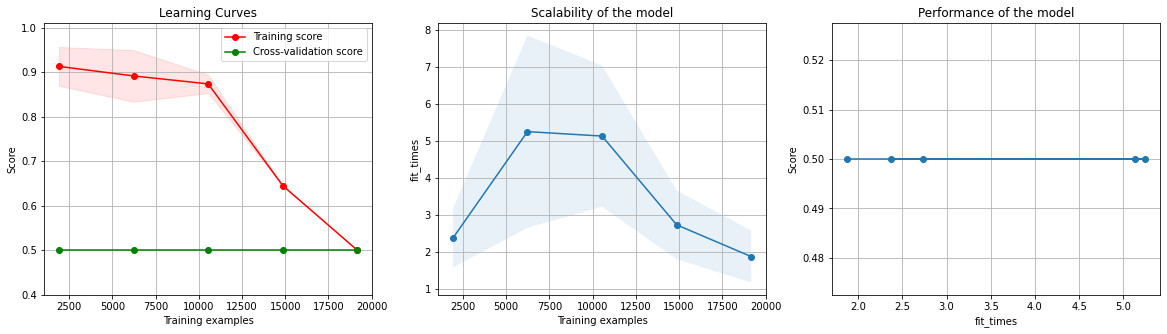

In [90]:
predicted_probas = clf_ica.predict_proba(X_ICA_test)

skplt.metrics.plot_roc(Y_ICA_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_ICA_test, y_probas=predicted_probas)
plt.show()

estimator = clf_ica
plot_learning_curve(estimator, "Learning Curves", X_ICA, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

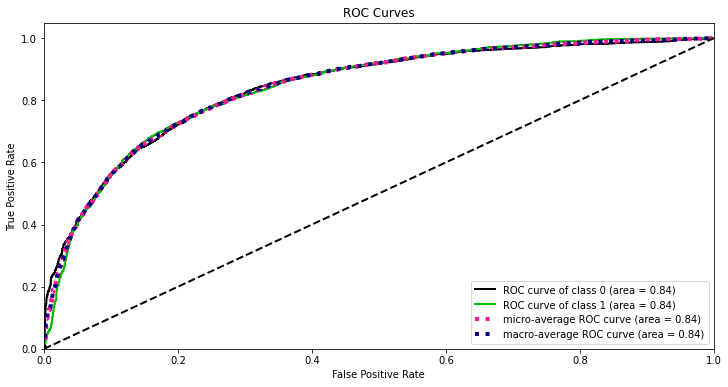

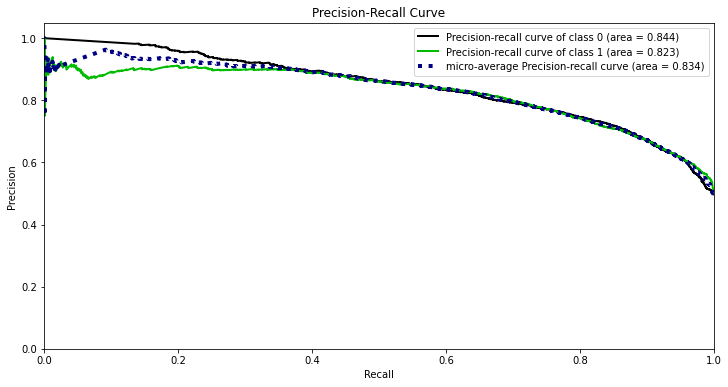

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

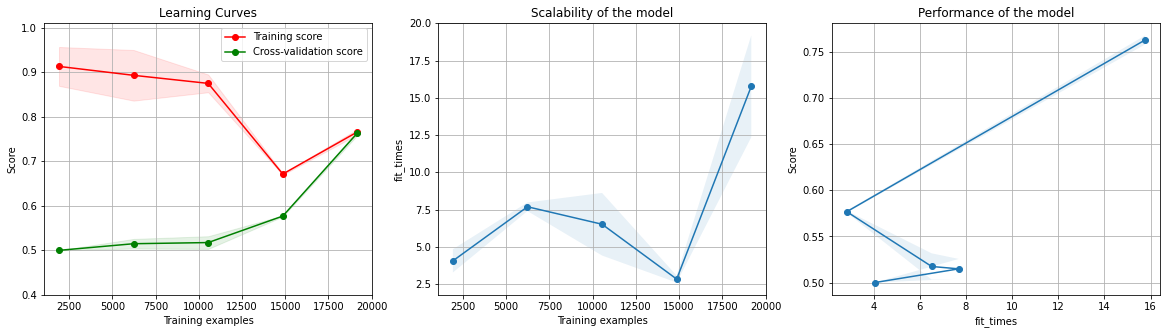

In [91]:
predicted_probas = clf_pca.predict_proba(X_PCA_test)

skplt.metrics.plot_roc(Y_PCA_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_PCA_test, y_probas=predicted_probas)
plt.show()

estimator = clf_pca
plot_learning_curve(estimator, "Learning Curves", X_PCA, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

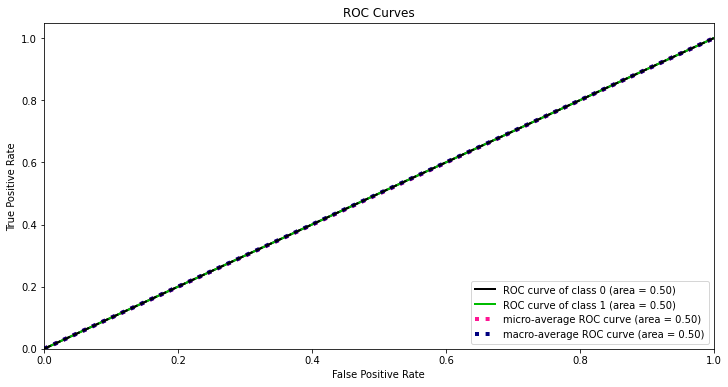

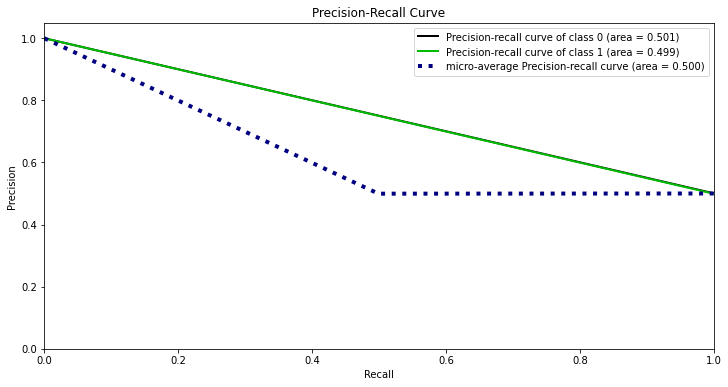

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

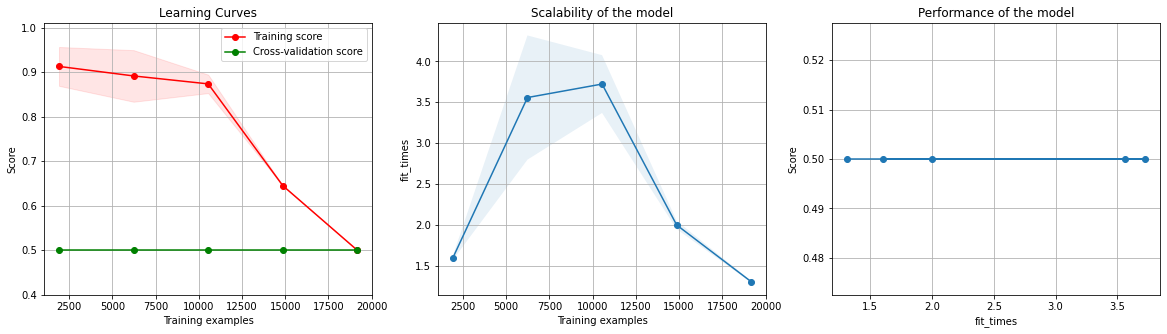

In [92]:
predicted_probas = clf_grp.predict_proba(X_grp_test)

skplt.metrics.plot_roc(Y_grp_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_grp_test, y_probas=predicted_probas)
plt.show()

estimator = clf_grp
plot_learning_curve(estimator, "Learning Curves", X_grp, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

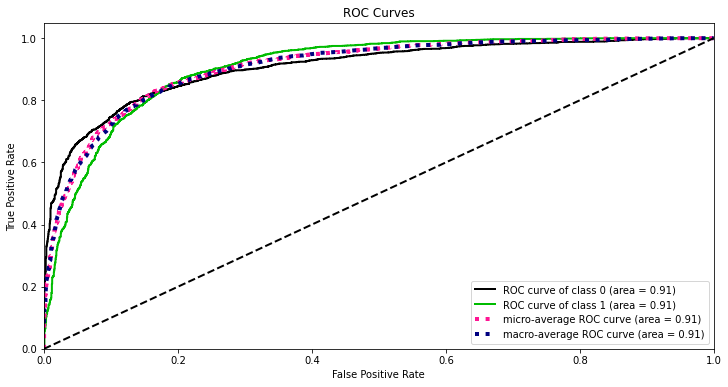

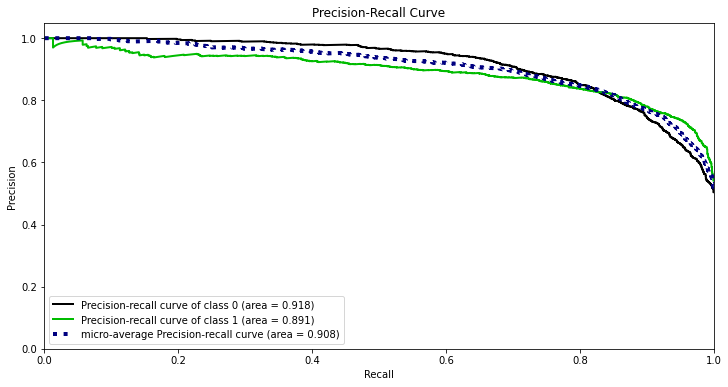

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

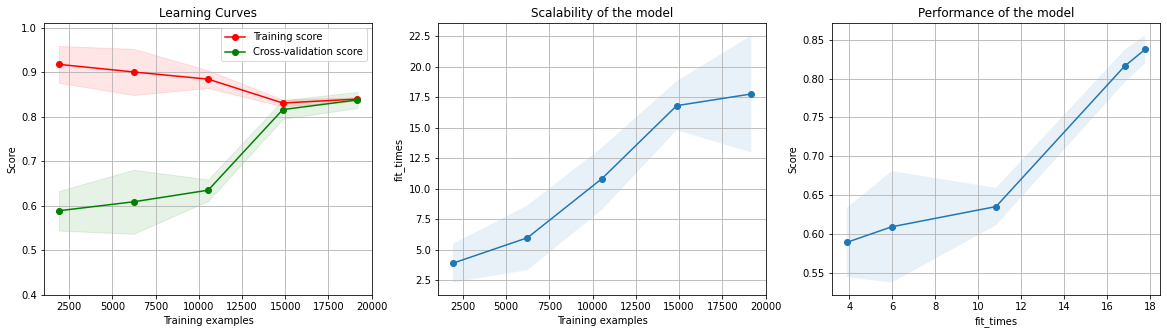

In [93]:
predicted_probas = clf_randforest.predict_proba(X_randforest_test)

skplt.metrics.plot_roc(Y_randforest_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_randforest_test, y_probas=predicted_probas)
plt.show()

estimator = clf_randforest
plot_learning_curve(estimator, "Learning Curves", X_RandForest, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

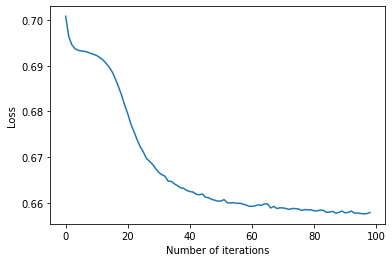

In [94]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_ica.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

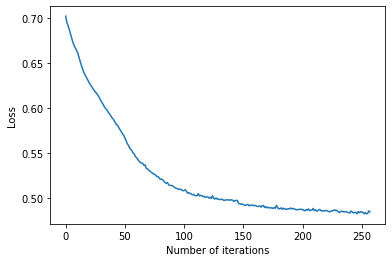

In [95]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_pca.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

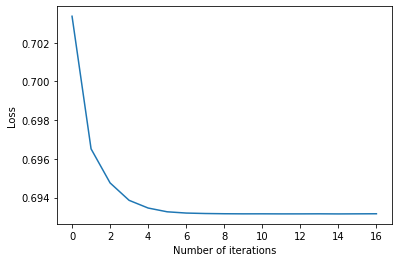

In [96]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_grp.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

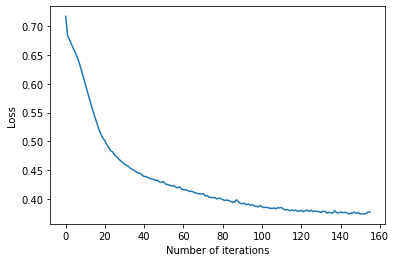

In [97]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_randforest.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

## NN2

In [98]:
gmm = GaussianMixture(n_components = 5, 
                      covariance_type = 'full',
                      n_init = 10,
                      max_iter = 1000,
                      random_state=50).fit(X)

gmm_labels = gmm.predict(X)

In [99]:
kmeans = KMeans(n_clusters=2, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)
kmeans_labels = kmeans.predict(X)

In [100]:
gmm_labels = pd.DataFrame(gmm_labels)
kmeans_labels = pd.DataFrame(kmeans_labels)


In [101]:
X_Clusters = pd.concat([kmeans_labels, gmm_labels], axis = 1)
X_Clusters.columns = ['kmeans', 'gmm']

In [102]:
X_Clusters 

,kmeans,gmm
0,1,2
1,0,0
2,0,3
3,1,2
4,1,1
...,...,...
23965,0,2
23966,1,1
23967,1,4
23968,0,2


In [103]:
X_clusters_train, X_clusters_test, Y_clusters_train, Y_clusters_test = train_test_split(X_Clusters,Y, random_state = 50, shuffle = True, test_size = 0.2)
X_clusters_train.head()

,kmeans,gmm
3230,1,1
12004,0,0
20580,1,1
15330,0,2
22419,0,4


In [104]:
%%time
parameter_space = {
    #'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    'hidden_layer_sizes' : [(10,7,5)]
    ,'activation': ['relu']
    ,'alpha': [0.0001, 0.0005, 0.001]
    ,'learning_rate' : ['constant', 'adaptive']
    ,'random_state' : [50]
}

GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)

CPU times: user 38 µs, sys: 15 µs, total: 53 µs
Wall time: 56.3 µs


In [105]:
%%time
GridSearch.fit(X_clusters_train, Y_clusters_train)

CPU times: user 10.3 s, sys: 24.1 ms, total: 10.3 s
Wall time: 56.6 s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.0005, 0.001],
                         'hidden_layer_sizes': [(10, 7, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'random_state': [50]})

In [106]:
GridSearch.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 7, 5),
 'learning_rate': 'constant',
 'random_state': 50}

In [107]:
%%time
clf_clusters = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   alpha = 0.0001,
                   activation = 'relu',
                   learning_rate = 'constant',
                    learning_rate_init = 0.01,
                    random_state = 42,
                    max_iter=2000).fit(X_clusters_train, Y_clusters_train)

CPU times: user 2.99 s, sys: 2.26 ms, total: 2.99 s
Wall time: 2.99 s


In [110]:
%%time
ClassPrediction = clf_clusters.predict(X_clusters_test)
Probability = clf_clusters.predict_proba(X_clusters_test)[:,1]

CPU times: user 12.2 ms, sys: 8.12 ms, total: 20.3 ms
Wall time: 9.21 ms


In [111]:
y_train_pred = clf_clusters.predict_proba(X_clusters_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_clusters.predict_proba(X_clusters_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_clusters_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_clusters_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_clusters_test, y_val_pred_pos)

ClassPrediction = clf_clusters.predict(X_clusters_test)
Probability = clf_clusters.predict_proba(X_clusters_test)[:,1]

print('Acuracy ', accuracy_score(Y_clusters_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_clusters_test,Probability))
print('PR ', average_precision_score(Y_clusters_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_clusters_test, ClassPrediction))
print(classification_report(Y_clusters_test, ClassPrediction))

Train AUC Score 0.6801727486208693
Test AUC Score 0.668434640613902
 
Acuracy  0.614726741760534
ROC_AUC  0.668434640613902
PR  0.6318711097360425
 
[[1105 1255]
 [ 592 1842]]
              precision    recall  f1-score   support

           0       0.65      0.47      0.54      2360
           1       0.59      0.76      0.67      2434

    accuracy                           0.61      4794
   macro avg       0.62      0.61      0.61      4794
weighted avg       0.62      0.61      0.61      4794



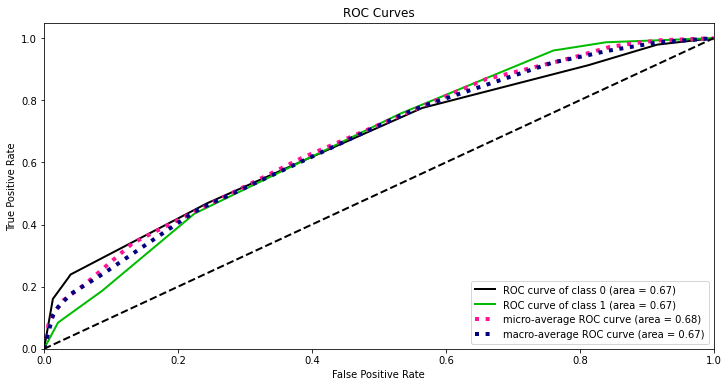

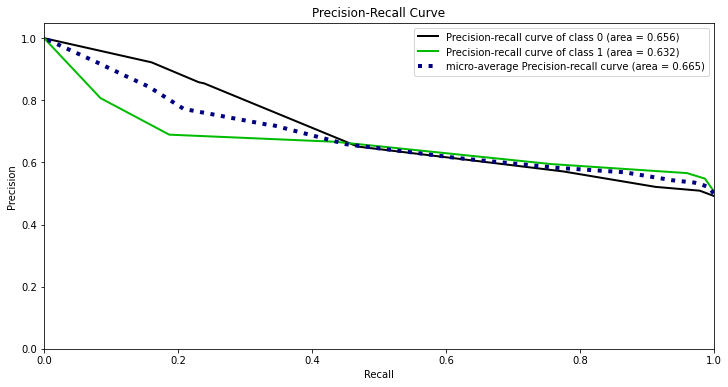

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

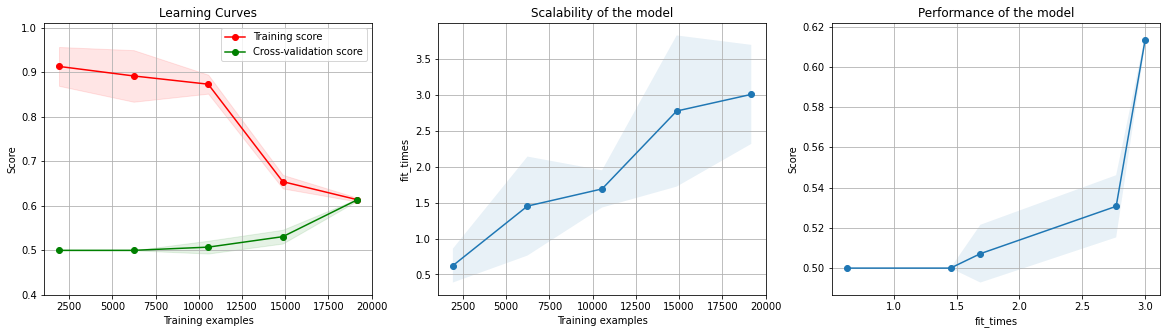

In [112]:
predicted_probas = clf_clusters.predict_proba(X_clusters_test)

skplt.metrics.plot_roc(Y_clusters_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_clusters_test, y_probas=predicted_probas)
plt.show()

estimator = clf_clusters
plot_learning_curve(estimator, "Learning Curves", X_Clusters, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

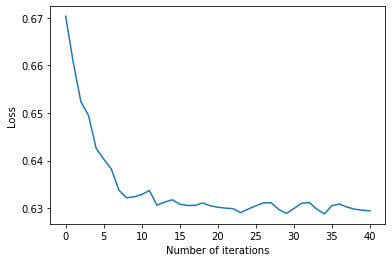

In [113]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_clusters.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()